# Fandango Ratings

***

*Is there a conflict of interest for a website that both sells movie tickets and displays review ratings?*

In 2015, the website FiveThirtyEight published an article titled, "[Be Supspicious of Online Movie Ratings, Especially Fandango's](https://fivethirtyeight.com/features/fandango-movies-ratings/)." According to their analysis, 98 percent of the films on the Fandango website had a 3-star rating or higher, and 75 percent had a 4-star rating or higher. Almost no movie received less than a 3 out of 5 star rating.

It could be that they are rounding up and visually using 3/5 when the correct data is 2.9 or 2.8. However, that may be giving them the benefit of the doubt since, in their reviews, there is almost nothing below a ★★★☆☆.

This seems strange to us because there are a lot of movies out there that are just awful, and for which we feel compelled to leave bad reviews. It's also interesting because Fandango is a site that derives income from selling movie tickets, and they could be influencing ticket sales by massaging movie ratings into more favorable numbers.

## Imports

We'll import some Python libraries, but there's nothing unusual here.
- *numpy* to handle an array function
- *pandas* to work with DataFrames
- *matplotlib* and *seaborn* to visualize the data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Rating Data

The data from FiveThirtyEight can be found on their GitHub page under the [fandango](https://github.com/fivethirtyeight/data/tree/master/fandango) repository.

```fandango_score_comparison.csv``` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

| Column      | Description |
| :---        | :---   |
| FILM | The film in question |
| RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film |
| RottenTomatoes_User | The Rotten Tomatoes user score for the film |
| Metacritic | The Metacritic critic score for the film |
| Metacritic_User | The Metacritic user score for the film |
| IMDB | The IMDb user score for the film |
| Fandango_Stars | The number of stars the film had on its Fandango movie page |
| Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained. |
| RT_norm | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system |
| RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system |
| Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system |
| Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system |
| IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system |
| RT_norm_round | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_vote_count | The number of user votes the film had on Metacritic |
| IMDB_user_vote_count | The number of user votes the film had on IMDb |
| Fandango_votes | The number of user votes the film had on Fandango |
| Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue |


```fandango_scrape.csv``` contains every film they scraped from the Fandango website.

| Column      | Description |
| :---        | :---   |
| FILM     | The movie       |
| STARS    | Number of stars presented on Fandango.com        |
| RATING   | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained. |
| VOTES    | The number of people who had reviewed the film at the time we pulled it. |


## Exploring the Data

In [4]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's look at the relationship between the popularity of a film and the rating. The scatterplot below shows this relationship.**

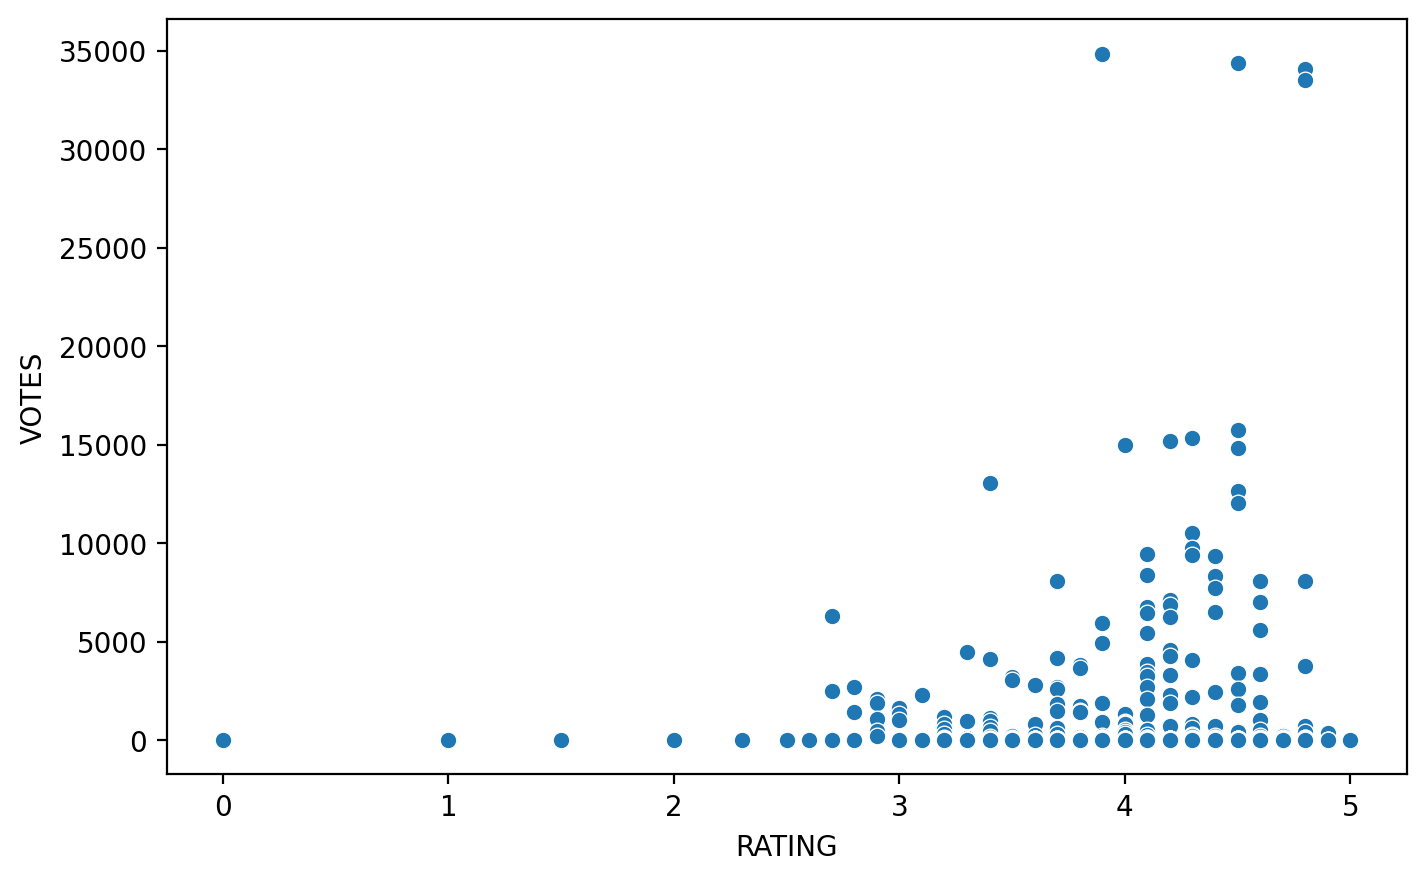

In [7]:
plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES');

**Calculating the correlation between the columns.**

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Extract the year from the film title column and count the number of movies per year.**

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title[-6:].replace('(','').replace(')',''))

In [10]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Cool. Most movies are from 2015. But, look! What is that movie from 1964? Just curious.**

In [12]:
fandango[fandango['YEAR'] == '1964']

,FILM,STARS,RATING,VOTES,YEAR
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Okay. What are the 10 movies with the most number of votes?**

In [13]:
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have zero votes?**

In [14]:
len(fandango[fandango['VOTES'] == 0])

69

**We are only interested in those movies that have 1 or more votes. So we can create a new dataframe with only movies that have ratings.**

In [15]:
reviewed_films = fandango[fandango['VOTES'] > 0]

In [16]:
reviewed_films

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Let's now plot the density curves for ratings and stars to see how those compare.**

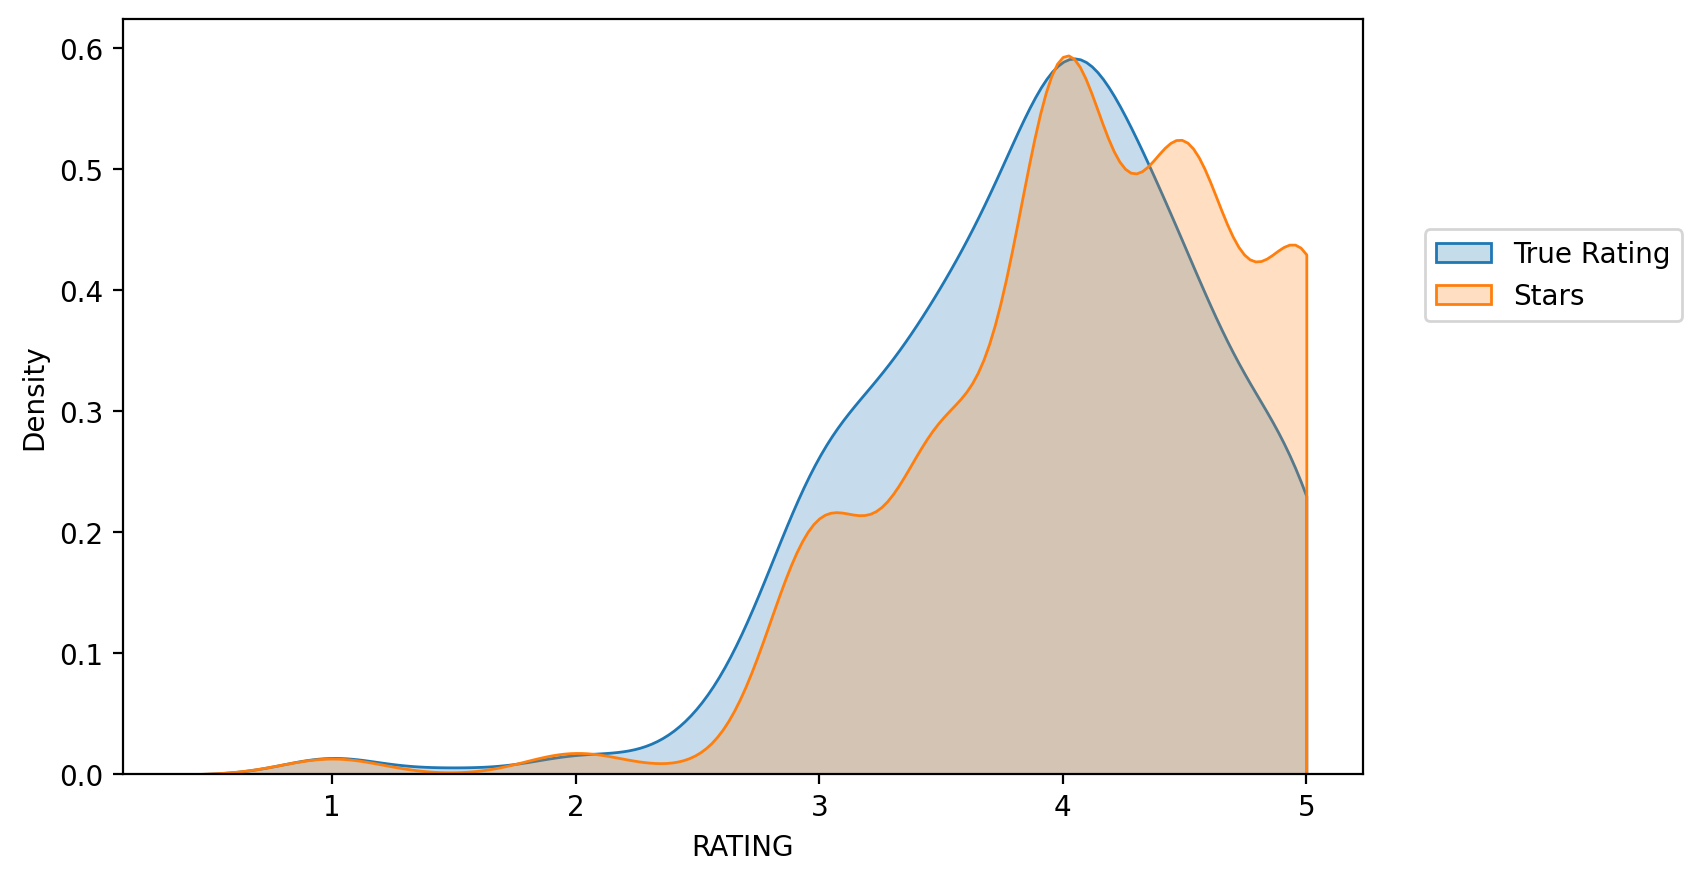

In [17]:
plt.figure(figsize=(8,5), dpi=200)
sns.kdeplot(data=reviewed_films, x='RATING', clip=[0,5], fill=True, label='True Rating');
sns.kdeplot(data=reviewed_films, x='STARS', clip=[0,5], fill=True, label='Stars');
plt.legend(loc=(1.05, 0.6))
plt.show()

We can see there's a subtle but noticeable difference between how viewers were rating films and what the Fandango pages were actually showing.

**Next, we can see this in more detail by creating another column in the DataFrame to show the numerical difference between each film's stars and true rating.**

In [46]:
# This generates a warning message about setting a value
# from a copy of a slice, that's okay for now
reviewed_films['STARS_DIFF'] = reviewed_films['STARS'] - reviewed_films['RATING']

/var/folders/fq/2wf05kqn7dv9g_d_ff0g42yh0000gn/T/ipykernel_22127/3625253240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films['STARS_DIFF'] = reviewed_films['STARS'] - reviewed_films['RATING']


In [19]:
reviewed_films['STARS_DIFF'] = reviewed_films['STARS_DIFF'].round(2)

/var/folders/fq/2wf05kqn7dv9g_d_ff0g42yh0000gn/T/ipykernel_22127/1697991032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films['STARS_DIFF'] = reviewed_films['STARS_DIFF'].round(2)


In [20]:
reviewed_films

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**With the new STARS_DIFF column, we can count the number of times a diffence occured between the number of stars shown on the site and the film's true rating.**

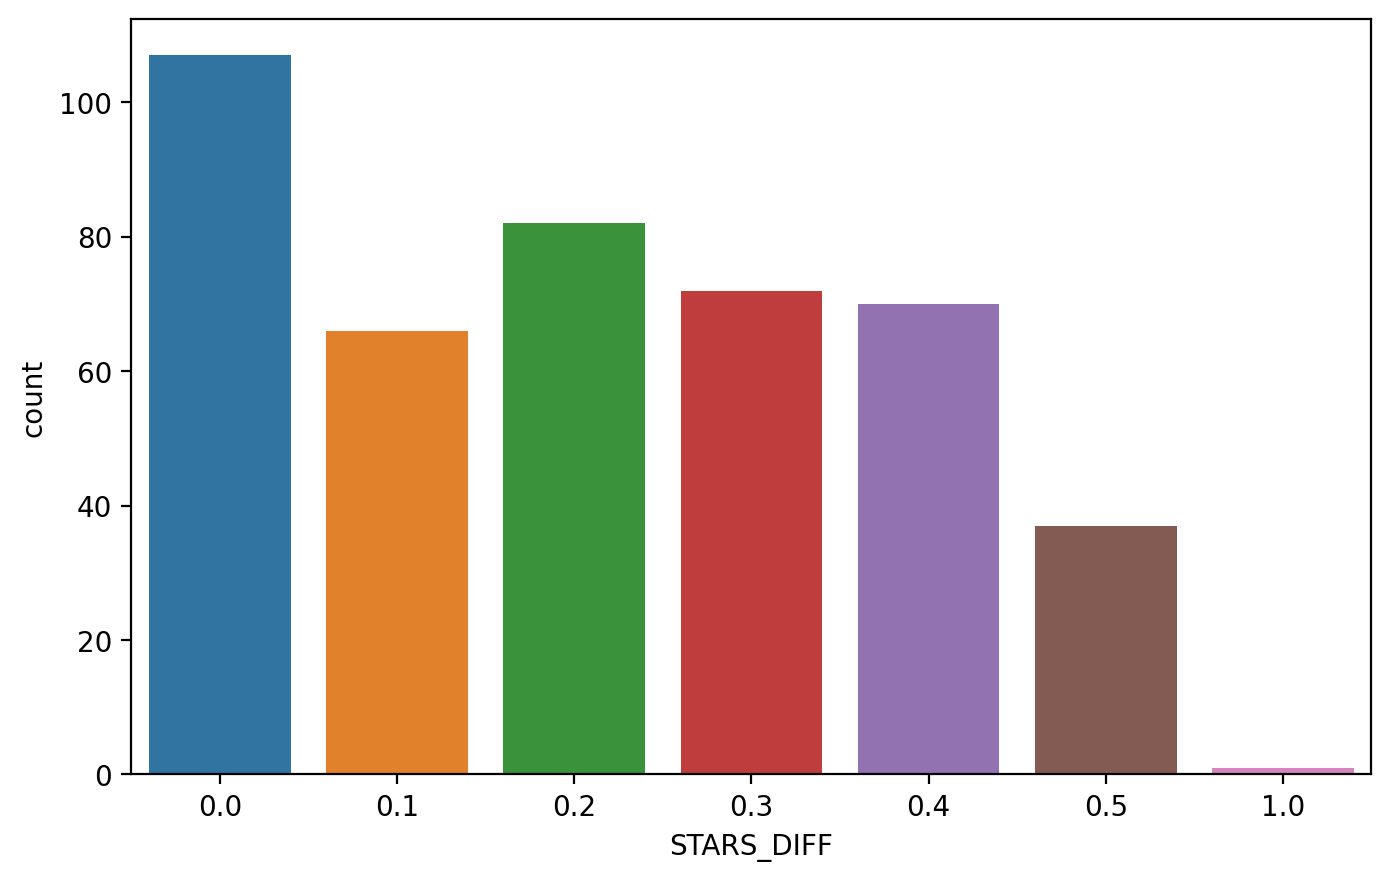

In [21]:
plt.figure(figsize=(8,5), dpi=200)
sns.countplot(data=reviewed_films, x='STARS_DIFF')
plt.show()

**Wow. One of the film ratings had a 1-star difference between what viewers rated and what was displayed on the Fandango website. What film is that?**

In [22]:
reviewed_films[reviewed_films['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Fandango Ratings vs. Other Sites

The FiveThirtyEight data included a scrape of Rotten Tomatoes, Metacritic, and IMDb ratings as well so we can compare those with the Fandango ratings too.

First, we'll load the data and take a peek at what it includes.

In [23]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


### Rotten Tomatoes

When we look at Rotten Tomatoes, there are two sets of reviews: the critic reviews and the user reviews.

**We can create a scatterplot to compare the critic and user reviews together.**

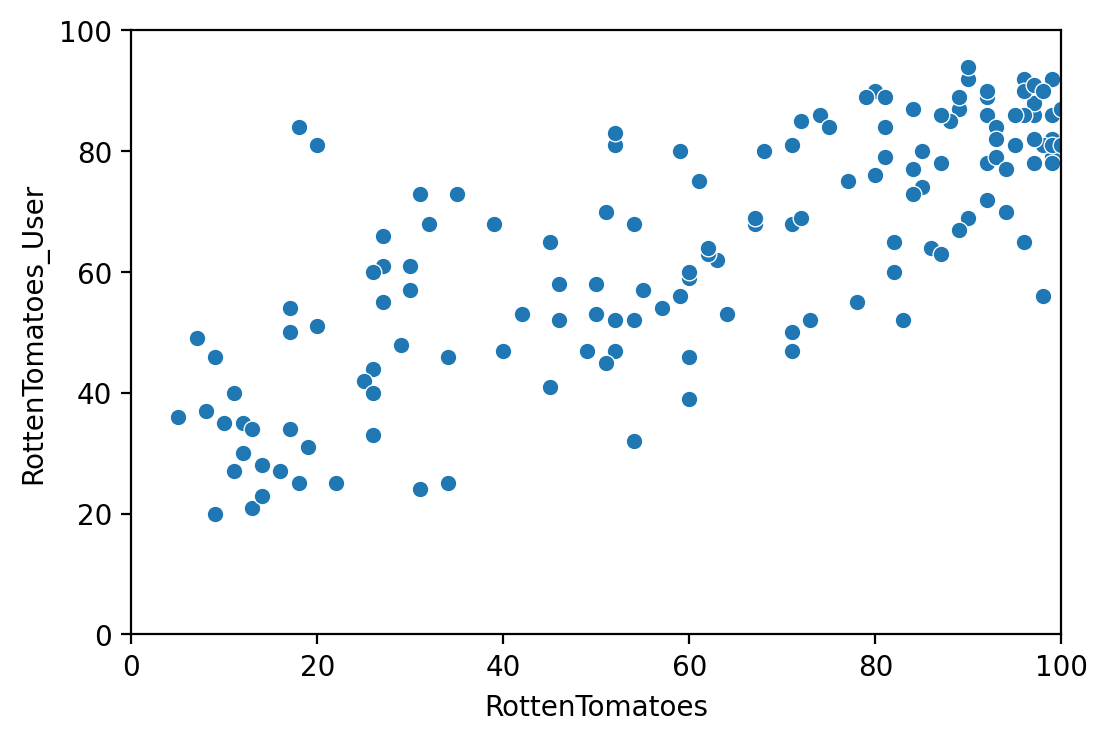

In [24]:
plt.figure(dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

The scatterplot shows a few outliers. Some users rated a film highly and the critics rated it lower. But generally, the chart shows a linear relationship between the two groups—that good movies are rated better than bad movies. There is also a cluster towards the top right that indicates many movies that critics and users both liked very much.

**For fun, let's create a new column of data that measures the difference between the critic rating and the user rating.**

In [25]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] -all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


We should also calculate the overall mean difference to compare these values, but we'll need to take the absolute value of the differences since some, or many, are negative.

**Calculating the Mean Absolute Difference between critic and user scores.**

In [26]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

That's interesting. On average, users rate films significantly better than their critics.

**We could show these differences in a distribution plot.**

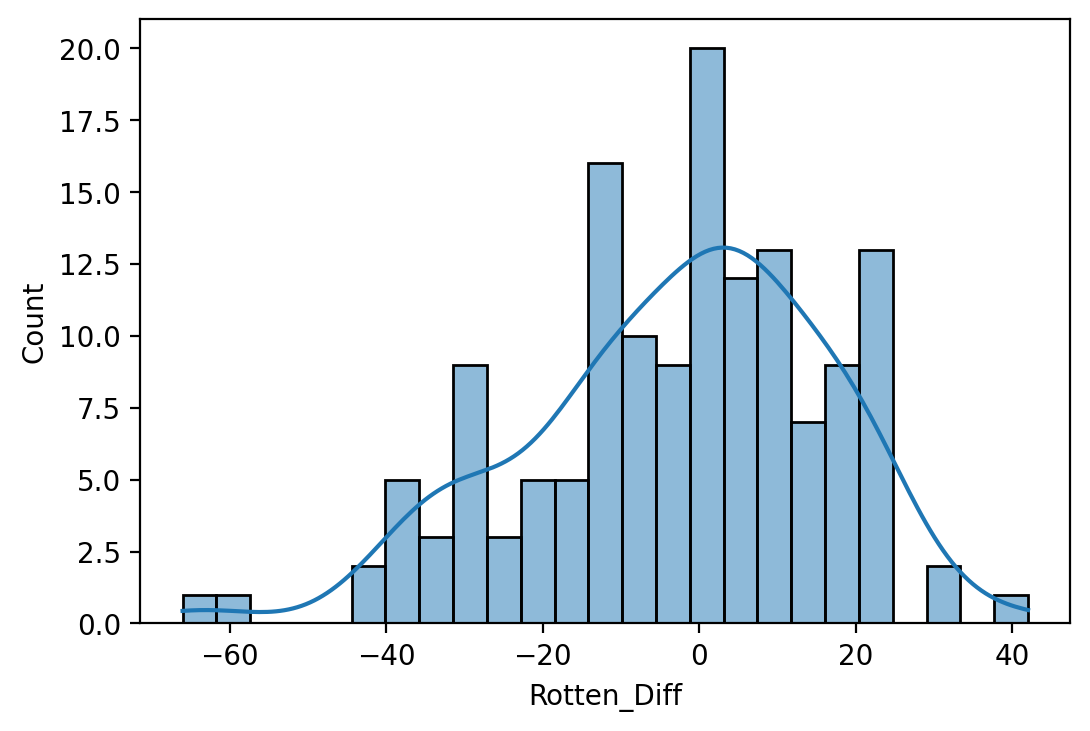

In [27]:
plt.figure(dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.show()

As the histogram also shows, there are a few outliers in the data on both ends.

**What are the top 5 movies users rated better than critics?**

In [28]:
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**What are the top 5 movies critics rated better than users?**

In [29]:
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

MetaCritic is another film site where users and critics post reviews. We can step through the same process as we did with Rotten Tomatoes.

**We can create a scatterplot to compare the critic and user reviews together.**

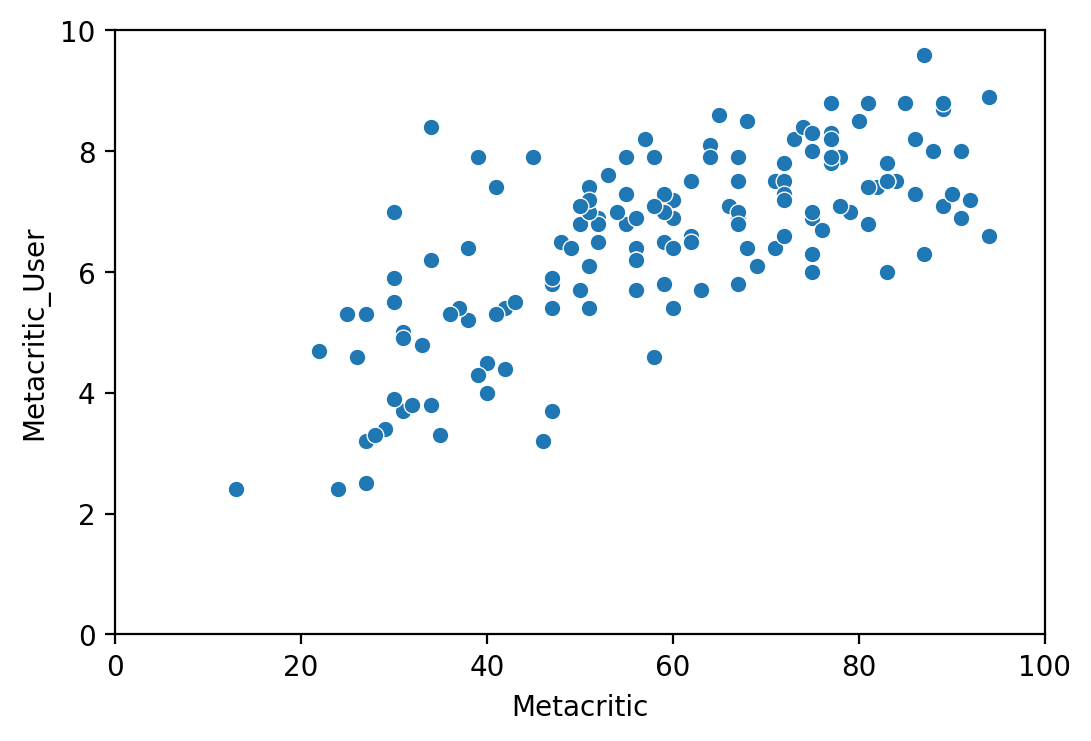

In [30]:
plt.figure(dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)
plt.show()

The Metacritic ratings for users go from 0-10 whereas the critic scores range from 0-100, but otherwise it mostly looks similar to Rotten Tomatoes but without major outliers; a linear relationship indicating that both critics and users are rating movies in a similar way.

### IMDb

Finally, we can explore IMDb. Both the IMDb and Metacritic data includes information on vote counts.

**We can use a scatterplot to show the relationship between vote counts on MetaCritic and IMDb**

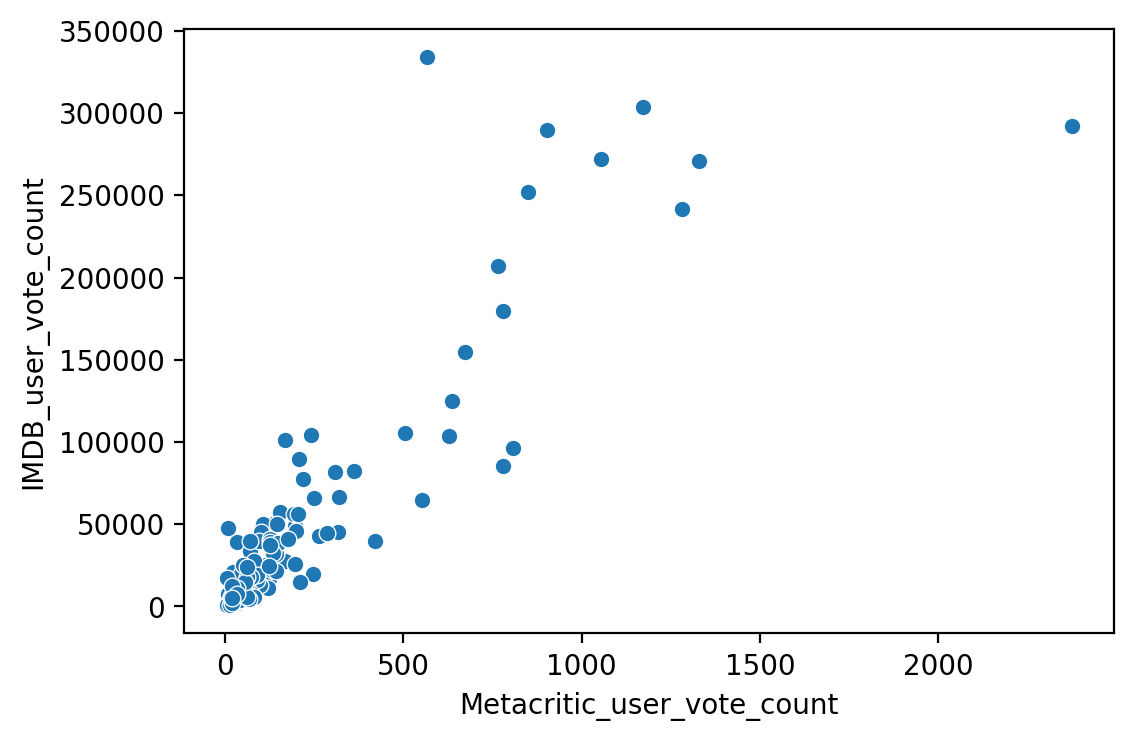

In [31]:
plt.figure(dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
plt.show()

The plot shows a lot of clustering below 50,000 user votes on IMDB and 500 user votes on MetaCritic. There are also a couple of big outliers.

**We can check on those outliers. First, we can look at the highest vote count for IMDB. Then, for Metacritic:**

In [32]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [33]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores Versus All Sites

So, is Fandango artificially inflating review ratings?

**We'll first need to combine Fandango and the All Sites data. We can do a simple inner join on FILM to merge columns.**

In [34]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


Next, we can normalize the ratings across Rotten Tomatoes, IMDB, and Metacritic so the all fall between 0 and 5 stars, to compare with Fandango.

**Normalize the movie score column data:**

- For scores based on 100; 100/20 = 5
- For scores based on 10; 10/2 = 5

In [35]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [36]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [37]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [38]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [39]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


We can get rid of the extra column data that's not needed for analysis and have just a DataFrame containing normalized ratings.

**Creating a normalized DataFrame**

In [40]:
df_norm = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [41]:
df_norm.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


So now we can plot the ratings on the same plot to compare them all together.

**Plotting the distribution curves for all ratings.**

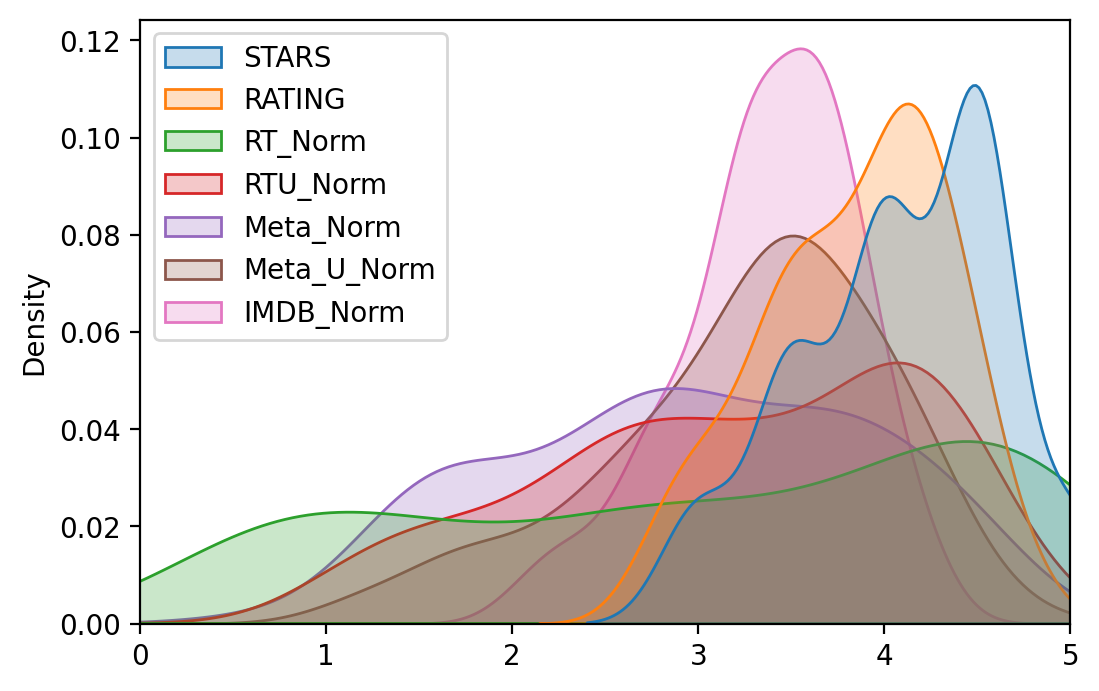

In [42]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

fig, ax = plt.subplots(dpi=200)
sns.kdeplot(data=df_norm, shade=True)
plt.xlim(0,5)
move_legend(ax, "upper left")
plt.show()

The distrubution curves clearly show the differences between the data sets with Fandango being significantly skewed higher than the rest.

**We can also plot just the user ratings without the critic reviews.**

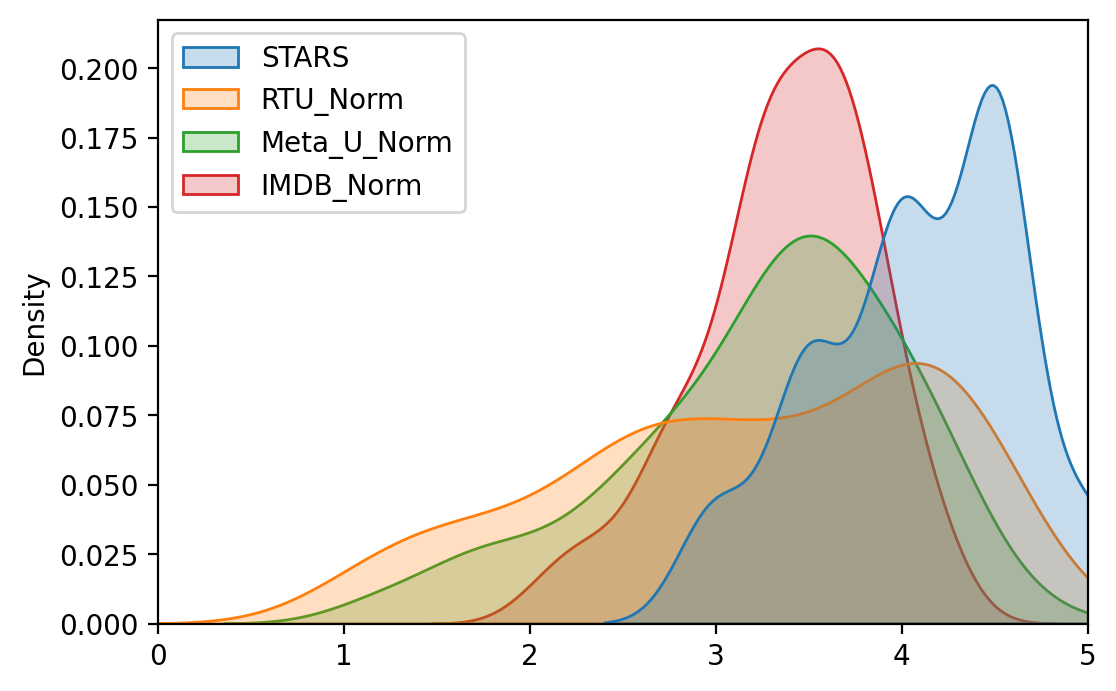

In [43]:
fig, ax = plt.subplots(dpi=200)
sns.kdeplot(data=df_norm[['STARS', 'RTU_Norm', 'Meta_U_Norm', 'IMDB_Norm']], shade=True)
plt.xlim(0,5)
move_legend(ax, "upper left")
plt.show()

## Final Thoughts

What started all this film rating analysis was a movie goer had watched a really bad film and was alarmed when he saw the film received a decent rating on Fandango.com. That movie was Taken 3, starring Liam Neeson.

**We can check the normalized scores for Taken 3 and see how those compare across sites.**

In [44]:
df_norm[df_norm['FILM'] == 'Taken 3 (2015)'].transpose()

,25
FILM,Taken 3 (2015)
STARS,4.5
RATING,4.1
RT_Norm,0.4
RTU_Norm,2.3
Meta_Norm,1.3
Meta_U_Norm,2.3
IMDB_Norm,3.0


This film has to be one of the worst offenders in the data set. Fandango rated it as a pretty decent movie (4.5) on their website, but all the other sites felt it was horrible.

In the aftermath of FiveThirtyEight's analysis, other blogs like [The Verge](https://www.theverge.com/2015/10/15/9545427/fandango-movie-reviews-inflated-stars) and those in the Data Science community picked up on the story and turned it into an embarrasing moment for Fandango.

Fandango simply said they were "working on it" and eventually acquired Rotten Tomatoes a few months later and are now listing RT reviews on their site. Taken 3 is correctly listed as **13%** for critics and **43%** for users.